# Upper Confidence Bound algorithm for budget optimisation

### Description:
The goal is to create a Multiarmed Bandit algortithm to indentify from different sets of advertising campaigns. 
Three different goals are defined and three different levels of performance for each campaign.
The goal is to use the UCB algortihtm to suggest the appropriate budget in each campaign according to their performance.

Since there are three different goals in order to use the UCB algorithm and compare the performance of all those campaigns I normalised all the metrics into the same scale.

In [1]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
import random 
%matplotlib inline 

In [2]:
## Create 15 different campaigns
camp_id_high=random.sample(range(21378956027,34189925731),5)
camp_id_medium=random.sample(range(21378958356,34189922971),5)
camp_id_low=random.sample(range(21895956291,34264911131),5)


In [3]:
camp_id_high=camp_id_high*49
camp_id_high= random.sample(camp_id_high, 245)

In [4]:
camp_id_medium=camp_id_medium*49
camp_id_medium= random.sample(camp_id_medium, 245)

In [5]:
camp_id_low=camp_id_low*49
camp_id_low= random.sample(camp_id_low, 245)

In [6]:
## Create 3 different goals
goals=['Installs', 'Clicks', 'Revenues']*82
camp_goals_high = random.sample(goals[:245], len(goals[:245]))
camp_goals_medium = random.sample(goals[:245], len(goals[:245]))
camp_goals_low = random.sample(goals[:245], len(goals[:245]))

In [7]:
roi_l1=[]*10
roi_l2=[]*10
roi_l3=[]*10
for i in range(0,10):
    roi_l1.append(random.uniform(0.1,0.65))
    roi_l2.append(random.uniform(0.1,0.65))
    roi_l3.append(random.uniform(0.1,0.65))

### Create pseudo data for low performing campaigns

In [8]:
low=pd.DataFrame()
low['campaign_id']=['31068621007']*10
low['campaign_goal']=['Revenues']*10 
low['campaign_budget']=[200.0]*10
low['revenues']=random.sample(range(71,226),10)
#low['ad_spend']=[254.1,124.8,200,120.9,279.5,123.9,307.8,189.76,235.8,218.9]
low['clicks']=[234,561,860,940,125,275,834,612,329,124]
low['installs']=[106,362,582,492,28,132,582,492,128,72]
low['ROI']=roi_l1


In [9]:
low

,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,31068621007,Revenues,200.0,199,234,106,0.257786
1,31068621007,Revenues,200.0,105,561,362,0.348520
2,31068621007,Revenues,200.0,144,860,582,0.180910
3,31068621007,Revenues,200.0,217,940,492,0.418071
4,31068621007,Revenues,200.0,132,125,28,0.180681
5,31068621007,Revenues,200.0,134,275,132,0.298428
6,31068621007,Revenues,200.0,215,834,582,0.485605
7,31068621007,Revenues,200.0,101,612,492,0.470952
8,31068621007,Revenues,200.0,114,329,128,0.232274
9,31068621007,Revenues,200.0,78,124,72,0.457068


In [10]:
low2=pd.DataFrame()
low2['campaign_id']=['31068622954']*10
low2['campaign_goal']=['Installs']*10 
low2['campaign_budget']=[180.0]*10

low2['revenues']=random.sample(range(62,286),10)
#low2['ad_spend']=[153.5,283.8,292.7,139.8,273.3,192.6,287.9,186.1,219.8,192.9]
low2['clicks']=random.sample(range(420,1000),10)
low2['installs']=[84,32,92,412,38,182,122,192,132,58]
low2['ROI']=roi_l2

In [11]:
low2

,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,31068622954,Installs,180.0,277,958,84,0.339022
1,31068622954,Installs,180.0,259,734,32,0.208343
2,31068622954,Installs,180.0,247,539,92,0.403459
3,31068622954,Installs,180.0,177,623,412,0.384632
4,31068622954,Installs,180.0,144,629,38,0.136221
5,31068622954,Installs,180.0,275,916,182,0.148683
6,31068622954,Installs,180.0,285,439,122,0.572598
7,31068622954,Installs,180.0,274,531,192,0.126862
8,31068622954,Installs,180.0,224,581,132,0.408870
9,31068622954,Installs,180.0,113,998,58,0.558563


In [12]:
low3=pd.DataFrame()
low3['campaign_id']=['31068623286']*10
low3['campaign_goal']=['Clicks']*10 
low3['campaign_budget']=[230.0]*10
low3['revenues']=random.sample(range(21,326),10)
#low3['ad_spend']=random.sample(range(179,256),10)
low3['clicks']=random.sample(range(20,530),10)
low3['installs']=random.sample(range(0,128),10)
low3['ROI']=roi_l3
low3

,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,31068623286,Clicks,230.0,298,276,86,0.178637
1,31068623286,Clicks,230.0,290,365,52,0.571927
2,31068623286,Clicks,230.0,305,249,107,0.436070
3,31068623286,Clicks,230.0,161,204,32,0.366792
4,31068623286,Clicks,230.0,272,493,42,0.307816
5,31068623286,Clicks,230.0,129,370,15,0.539182
6,31068623286,Clicks,230.0,67,351,17,0.633435
7,31068623286,Clicks,230.0,110,251,95,0.448090
8,31068623286,Clicks,230.0,180,472,39,0.415734
9,31068623286,Clicks,230.0,286,30,64,0.372452


In [13]:
low_df=pd.concat([low, low2,low3], axis=0)
low_df.reset_index(drop=True, inplace=True)
low_df.to_csv('data/low_performing.csv')

### Create pseudo data for medium performing campaigns

In [14]:
roi_m1=[]*10
roi_m2=[]*10
roi_m3=[]*10
for i in range(0,10):
    roi_m1.append(random.uniform(0.7,1.5))
    roi_m2.append(random.uniform(0.7,1.5))
    roi_m3.append(random.uniform(0.7,1.5))

In [15]:
medium=pd.DataFrame()
medium['campaign_id']=['32348622185']*10
medium['campaign_goal']=['Revenues']*10 
medium['campaign_budget']=[250.0]*10
medium['revenues']=random.sample(range(151,526),10)
medium['clicks']=random.sample(range(169,798),10)
medium['installs']=random.sample(range(30,120),10)
medium['ROI']=roi_m1
medium

,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,32348622185,Revenues,250.0,294,506,77,0.867171
1,32348622185,Revenues,250.0,319,722,93,1.075709
2,32348622185,Revenues,250.0,223,388,94,1.012413
3,32348622185,Revenues,250.0,505,666,61,0.931014
4,32348622185,Revenues,250.0,441,520,73,0.822136
5,32348622185,Revenues,250.0,354,183,52,0.803084
6,32348622185,Revenues,250.0,281,552,90,1.130545
7,32348622185,Revenues,250.0,184,558,39,1.128141
8,32348622185,Revenues,250.0,351,503,92,1.345535
9,32348622185,Revenues,250.0,417,384,86,1.178735


In [16]:
medium2=pd.DataFrame()
medium2['campaign_id']=['32348621782']*10
medium2['campaign_goal']=['Installs']*10 
medium2['campaign_budget']=[300.0]*10
medium2['revenues']=random.sample(range(129,679),10)
medium2['clicks']=random.sample(range(175,769),10)
medium2['installs']=random.sample(range(40,110),10)
medium2['ROI']=roi_m2
medium2

,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,32348621782,Installs,300.0,516,179,49,1.297895
1,32348621782,Installs,300.0,317,444,55,1.082220
2,32348621782,Installs,300.0,190,540,40,0.825485
3,32348621782,Installs,300.0,591,754,70,0.900704
4,32348621782,Installs,300.0,513,343,60,1.130063
5,32348621782,Installs,300.0,241,535,109,0.882022
6,32348621782,Installs,300.0,192,415,51,1.317316
7,32348621782,Installs,300.0,465,583,43,1.382256
8,32348621782,Installs,300.0,156,612,58,1.349267
9,32348621782,Installs,300.0,253,674,105,1.339975


In [17]:
medium3=pd.DataFrame()
medium3['campaign_id']=['32347221756']*10
medium3['campaign_goal']=['Clicks']*10 
medium3['campaign_budget']=[280.0]*10
medium3['revenues']=random.sample(range(192,749),10)
medium3['clicks']=random.sample(range(270,969),10)
medium3['installs']=random.sample(range(80,190),10)
medium3['ROI']=roi_m3
medium3

,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,32347221756,Clicks,280.0,359,584,166,1.368995
1,32347221756,Clicks,280.0,463,781,161,1.002680
2,32347221756,Clicks,280.0,307,297,140,1.385890
3,32347221756,Clicks,280.0,219,740,98,1.085742
4,32347221756,Clicks,280.0,579,481,141,0.779343
5,32347221756,Clicks,280.0,547,725,167,1.473573
6,32347221756,Clicks,280.0,680,915,125,0.727409
7,32347221756,Clicks,280.0,361,770,187,1.171649
8,32347221756,Clicks,280.0,729,893,105,1.420823
9,32347221756,Clicks,280.0,346,271,87,0.994415


In [18]:
medium_df=pd.concat([medium, medium2,medium3], axis=0)
medium_df.reset_index(drop=True, inplace=True)
medium_df.to_csv('data/medium_performing.csv')

### Create pseudo data for high performing campaigns

In [19]:
roi_h1=[]*10
roi_h2=[]*10
roi_h3=[]*10
for i in range(0,10):
    roi_h1.append(random.uniform(1.51,3.1))
    roi_h2.append(random.uniform(1.51,3.1))
    roi_h3.append(random.uniform(1.51,3.1))
    
high=pd.DataFrame()
high['campaign_id']=['32348622201']*10
high['campaign_goal']=['Revenues']*10 
high['campaign_budget']=[350.0]*10
high['revenues']=random.sample(range(569,1526),10)
high['clicks']=random.sample(range(520,1793),10)
high['installs']=random.sample(range(120,420),10)
high['ROI']=roi_h1

high2=pd.DataFrame()
high2['campaign_id']=['32348622372']*10
high2['campaign_goal']=['Installs']*10 
high2['campaign_budget']=[400.0]*10
high2['revenues']=random.sample(range(492,1679),10)
high2['clicks']=random.sample(range(729,1269),10)
high2['installs']=random.sample(range(150,410),10)
high2['ROI']=roi_h2

high3=pd.DataFrame()
high3['campaign_id']=['32347218253']*10
high3['campaign_goal']=['Clicks']*10 
high3['campaign_budget']=[420.0]*10
high3['revenues']=random.sample(range(417,1283),10)
high3['clicks']=random.sample(range(391,1283),10)
high3['installs']=random.sample(range(129,502),10)
high3['ROI']=roi_h3

high_df=pd.concat([high, high2,high3], axis=0)
high_df.reset_index(drop=True, inplace=True)
high_df.to_csv('data/high_performing.csv')

## Start the analysis

In [20]:
df_low=pd.read_csv('data/low_performing.csv')
df_medium=pd.read_csv('data/medium_performing.csv')
df_high=pd.read_csv('data/high_performing.csv')

import math
import matplotlib.pyplot as plt
import pandas as pd

data = pd.concat([df_low, df_medium,df_high], axis=0)
data.reset_index(drop=True, inplace=True)

In [21]:
campaigns=data.campaign_id.unique()
campaigns

array([31068621007, 31068622954, 31068623286, 32348622185, 32348621782,
       32347221756, 32348622201, 32348622372, 32347218253])

In [22]:
data1=data.loc[data['campaign_id']==campaigns[0]].reset_index(drop=True)
data2=data.loc[data['campaign_id']==campaigns[1]].reset_index(drop=True)
data3=data.loc[data['campaign_id']==campaigns[2]].reset_index(drop=True)
data4=data.loc[data['campaign_id']==campaigns[3]].reset_index(drop=True)
data5=data.loc[data['campaign_id']==campaigns[4]].reset_index(drop=True)
data6=data.loc[data['campaign_id']==campaigns[5]].reset_index(drop=True)
data7=data.loc[data['campaign_id']==campaigns[6]].reset_index(drop=True)
data8=data.loc[data['campaign_id']==campaigns[7]].reset_index(drop=True)
data9=data.loc[data['campaign_id']==campaigns[8]].reset_index(drop=True)



In [23]:
data9

,Unnamed: 0,campaign_id,campaign_goal,campaign_budget,revenues,clicks,installs,ROI
0,20,32347218253,Clicks,420.0,820,867,376,2.653902
1,21,32347218253,Clicks,420.0,979,560,441,2.429844
2,22,32347218253,Clicks,420.0,1133,489,211,2.745374
3,23,32347218253,Clicks,420.0,1073,497,397,1.670438
4,24,32347218253,Clicks,420.0,780,1021,152,2.572467
5,25,32347218253,Clicks,420.0,1145,521,239,1.773861
6,26,32347218253,Clicks,420.0,1156,1000,160,2.430080
7,27,32347218253,Clicks,420.0,1157,835,252,1.531835
8,28,32347218253,Clicks,420.0,634,569,144,2.508117
9,29,32347218253,Clicks,420.0,601,1267,481,2.905178


In [24]:

df=pd.DataFrame()
df['Camp'+str(0)]=data1.ROI/3.056679

df1=pd.DataFrame()
df1['Camp'+str(1)]=data2.ROI/3.056679

df2=pd.DataFrame()
df2['Camp'+str(2)]=data3.ROI/3.056679

df3=pd.DataFrame()
df3['Camp'+str(3)]=data4.ROI/3.056679

df4=pd.DataFrame()
df4['Camp'+str(4)]=data5.ROI/3.056679

df5=pd.DataFrame()
df5['Camp'+str(5)]=data6.ROI/3.056679

df6=pd.DataFrame()
df6['Camp'+str(6)]=data7.ROI/3.056679

df7=pd.DataFrame()
df7['Camp'+str(7)]=data8.ROI/3.056679

df8=pd.DataFrame()
df8['Camp'+str(8)]=data9.ROI/3.056679


#data_new = pd.concat([df, df1,df2,df3,df4,df5,df6,df7,df8], axis=0)
#data_new.reset_index(drop=True, inplace=True)
df=df.join(df1)
df=df.join(df2)
df=df.join(df3)
df=df.join(df4)
df=df.join(df5)
df=df.join(df6)
df=df.join(df7)
df=df.join(df8)


In [25]:
df

,Camp0,Camp1,Camp2,Camp3,Camp4,Camp5,Camp6,Camp7,Camp8
0,0.084335,0.110912,0.058442,0.283697,0.424610,0.447870,0.631568,0.822101,0.868230
1,0.114019,0.068160,0.187107,0.351921,0.354051,0.328029,0.589305,0.505895,0.794929
2,0.059185,0.131993,0.142661,0.331213,0.270059,0.453397,0.551610,0.610179,0.898156
3,0.136773,0.125833,0.119997,0.304584,0.294667,0.355203,1.006180,0.558135,0.546488
4,0.059110,0.044565,0.100703,0.268964,0.369703,0.254964,0.729571,0.521489,0.841589
5,0.097632,0.048642,0.176395,0.262731,0.288556,0.482083,0.530515,0.612334,0.580323
6,0.158867,0.187327,0.207230,0.369860,0.430963,0.237974,0.758391,0.708744,0.795007
7,0.154073,0.041503,0.146594,0.369074,0.452208,0.383308,0.886569,0.967717,0.501144
8,0.075989,0.133763,0.136009,0.440195,0.441416,0.464826,0.514880,0.745636,0.820537
9,0.149531,0.182735,0.121849,0.385626,0.438376,0.325325,0.684901,0.784444,0.950436




Rewards By Machine =  [0.08433521547901117, 0.06816007590508523, 0.14266139375363102, 0.3045836178536016, 0.36970279928523314, 0.48208285105429544, 0.7583914571346958, 0.9677173823925387, 0.8205366902149167]

Total Rewards by UCB =  3.9981714830730093

Machine Selected At Each Round By UCB: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8]


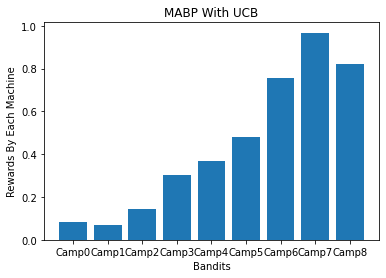

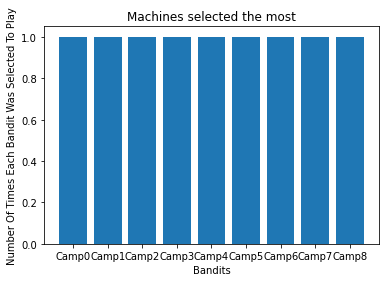

In [26]:
observations = 9
machines = 9
numbers_of_selections_of_each_machine = [0] * machines
sums_of_rewards_for_each_machine = [0] * machines
machines_selected = []
total_rewards = 0

for n in range(observations):
    bandit = 0
    max_upper_bound = 0
    
    for i in range(machines):
        if (numbers_of_selections_of_each_machine[i] > 0):        
            average_reward = sums_of_rewards_for_each_machine[i] / numbers_of_selections_of_each_machine[i]           
            di = math.sqrt(3/2 * math.log(n + 1) / numbers_of_selections_of_each_machine[i])           
            upper_bound = average_reward + di
            
        else:
            upper_bound = 1e400
            
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            bandit = i
   
    machines_selected.append(bandit) 
    numbers_of_selections_of_each_machine[bandit] = numbers_of_selections_of_each_machine[bandit] + 1
    reward = df.values[n, bandit]
    sums_of_rewards_for_each_machine[bandit] = sums_of_rewards_for_each_machine[bandit] + reward
    total_rewards = total_rewards + reward

print("\n\nRewards By Machine = ", sums_of_rewards_for_each_machine)
print("\nTotal Rewards by UCB = ", total_rewards)
print("\nMachine Selected At Each Round By UCB: \n", machines_selected)

#'Camp0','Camp1','Camp2','Camp3','Camp4','Camp5','Camp6','Camp7','Camp8','Camp9','Camp10','Camp11','Camp12','Camp13','Camp14','Camp15','Camp16','Camp17','Camp18','Camp19'
#Visualizing the rewards of each machine
plt.bar(['Camp0','Camp1','Camp2','Camp3','Camp4','Camp5','Camp6','Camp7','Camp8'],sums_of_rewards_for_each_machine)
plt.title('MABP With UCB')
plt.xlabel('Bandits')
plt.ylabel('Rewards By Each Machine')
plt.show()

#Visualizing the selections of each machine
plt.bar(['Camp0','Camp1','Camp2','Camp3','Camp4','Camp5','Camp6','Camp7','Camp8'],numbers_of_selections_of_each_machine)
plt.title('Machines selected the most')
plt.xlabel('Bandits')
plt.ylabel('Number Of Times Each Bandit Was Selected To Play')
plt.show()

In [27]:
df=pd.DataFrame()
df['Camp'+str(0)]=data1.campaign_budget

df1=pd.DataFrame()
df1['Camp'+str(1)]=data2.campaign_budget

df2=pd.DataFrame()
df2['Camp'+str(2)]=data3.campaign_budget

df3=pd.DataFrame()
df3['Camp'+str(3)]=data4.campaign_budget

df4=pd.DataFrame()
df4['Camp'+str(4)]=data5.campaign_budget

df5=pd.DataFrame()
df5['Camp'+str(5)]=data6.campaign_budget

df6=pd.DataFrame()
df6['Camp'+str(6)]=data7.campaign_budget

df7=pd.DataFrame()
df7['Camp'+str(7)]=data8.campaign_budget

df8=pd.DataFrame()
df8['Camp'+str(8)]=data9.campaign_budget


#data_new = pd.concat([df, df1,df2,df3,df4,df5,df6,df7,df8], axis=0)
#data_new.reset_index(drop=True, inplace=True)
df=df.join(df1)
df=df.join(df2)
df=df.join(df3)
df=df.join(df4)
df=df.join(df5)
df=df.join(df6)
df=df.join(df7)
df=df.join(df8)
df

,Camp0,Camp1,Camp2,Camp3,Camp4,Camp5,Camp6,Camp7,Camp8
0,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
1,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
2,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
3,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
4,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
5,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
6,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
7,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
8,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0
9,200.0,180.0,230.0,250.0,300.0,280.0,350.0,400.0,420.0


In [28]:
reward=[0.4410494542561773, 0.20032217937851088, 0.4613920390972375, 1.0448011055289426, 1.1791667601174367, 1.3034152242897628
                      , 1.8605854800322816, 1.8120709917315625, 2.196704791675942]

sum(reward)

10.499508026107854

In [29]:
r=pd.DataFrame()
#r['old_position']=[]
r['current_budget']=[200,180,230,250,300,280,350,400,420 ]
r['total_budget']=[sum(r.current_budget)]*9
r['expected_percentage']=round(r.current_budget/r.total_budget*100,0)
r['real_percentage']=reward
r.real_percentage=[4.0,3.0
,4.0
,10.0
,11.0
,12.0
,18.0
,17.0
,21.0]#round((r.real_percentage/10.499508026107854)*100,0)
r['new_budget']=[0]*9
for i in range(len(r)):
    if r.expected_percentage[i]==r.real_percentage[i]:
        
        r['new_budget'][i]=r['current_budget'][i]
    elif r.expected_percentage[i]>r.real_percentage[i]:
        
        r['new_budget'][i]=r['current_budget'][i] -((r['expected_percentage'][i] - r['real_percentage'][i])*r['total_budget'][i]/100)
        
    else:
        r['new_budget'][i]=r['current_budget'][i] +abs((r['expected_percentage'][i] - r['real_percentage'][i])*r['total_budget'][i]/100)
        


<ipython-input-29-5e6a67aa910f>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['new_budget'][i]=r['current_budget'][i] -((r['expected_percentage'][i] - r['real_percentage'][i])*r['total_budget'][i]/100)
<ipython-input-29-5e6a67aa910f>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['new_budget'][i]=r['current_budget'][i]
<ipython-input-29-5e6a67aa910f>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r['new_budget'][i]=r['cur

In [30]:
r=r.drop(['total_budget'],axis=1)
r

,current_budget,expected_percentage,real_percentage,new_budget
0,200,8.0,4.0,95
1,180,7.0,3.0,75
2,230,9.0,4.0,99
3,250,10.0,10.0,250
4,300,11.0,11.0,300
5,280,11.0,12.0,306
6,350,13.0,18.0,480
7,400,15.0,17.0,452
8,420,16.0,21.0,550


In [31]:
## effect of the new budget:
### lOW 

roi_l1=[]*10
roi_l2=[]*10
roi_l3=[]*10
for i in range(0,10):
    roi_l1.append(random.uniform(0.1,0.67))
    roi_l2.append(random.uniform(0.1,0.67))
    roi_l3.append(random.uniform(0.1,0.67))
low=pd.DataFrame()
low['campaign_id']=['31068621007']*10
low['campaign_goal']=['Revenues']*10 
low['campaign_budget']=[95]*10
# low['revenues']=random.sample(range(81,226),10)
# #low['ad_spend']=[254.1,124.8,200,120.9,279.5,123.9,307.8,189.76,235.8,218.9]
# low['clicks']=[234,561,860,940,125,275,834,612,329,124]
# low['installs']=[106,362,582,492,28,132,582,492,128,72]
low['ROI']=roi_l1


low2=pd.DataFrame()
low2['campaign_id']=['31068622954']*10
low2['campaign_goal']=['Installs']*10 
low2['campaign_budget']=[75]*10

# low2['revenues']=random.sample(range(62,286),10)
# #low2['ad_spend']=[153.5,283.8,292.7,139.8,273.3,192.6,287.9,186.1,219.8,192.9]
# low2['clicks']=random.sample(range(420,1000),10)
# low2['installs']=[84,32,92,412,38,182,122,192,132,58]
low2['ROI']=roi_l2

low3=pd.DataFrame()
low3['campaign_id']=['31068623286']*10
low3['campaign_goal']=['Clicks']*10 
low3['campaign_budget']=[99]*10
# low3['revenues']=random.sample(range(21,326),10)
# #low3['ad_spend']=random.sample(range(179,256),10)
# low3['clicks']=random.sample(range(20,530),10)
# low3['installs']=random.sample(range(0,128),10)
low3['ROI']=roi_l3
low3

low_df=pd.concat([low, low2,low3], axis=0)
low_df.reset_index(drop=True, inplace=True)
low_df.to_csv('data/low_performing_newbudget.csv')
low_df

,campaign_id,campaign_goal,campaign_budget,ROI
0,31068621007,Revenues,95,0.584885
1,31068621007,Revenues,95,0.203995
2,31068621007,Revenues,95,0.515613
3,31068621007,Revenues,95,0.432143
4,31068621007,Revenues,95,0.184213
5,31068621007,Revenues,95,0.419185
6,31068621007,Revenues,95,0.195454
7,31068621007,Revenues,95,0.252468
8,31068621007,Revenues,95,0.350772
9,31068621007,Revenues,95,0.437165


In [32]:
## MEDIUM

roi_m1=[]*10
roi_m2=[]*10
roi_m3=[]*10
for i in range(0,10):
    roi_m1.append(random.uniform(0.798,1.755))
    roi_m2.append(random.uniform(0.798,1.755))
    roi_m3.append(random.uniform(0.798,1.755))
    
medium=pd.DataFrame()
medium['campaign_id']=['32348622185']*10
medium['campaign_goal']=['Revenues']*10 
medium['campaign_budget']=[250]*10
# medium['revenues']=random.sample(range(151,526),10)
# medium['clicks']=random.sample(range(169,798),10)
# medium['installs']=random.sample(range(30,120),10)
medium['ROI']=roi_m1
    
medium2=pd.DataFrame()
medium2['campaign_id']=['32348621782']*10
medium2['campaign_goal']=['Installs']*10 
medium2['campaign_budget']=[300]*10
# medium2['revenues']=random.sample(range(129,679),10)
# medium2['clicks']=random.sample(range(175,769),10)
# medium2['installs']=random.sample(range(40,110),10)
medium2['ROI']=roi_m2


medium3=pd.DataFrame()
medium3['campaign_id']=['32347221756']*10
medium3['campaign_goal']=['Clicks']*10 
medium3['campaign_budget']=[306]*10
# medium3['revenues']=random.sample(range(192,749),10)
# medium3['clicks']=random.sample(range(270,969),10)
# medium3['installs']=random.sample(range(80,190),10)
medium3['ROI']=roi_m3

medium_df=pd.concat([medium, medium2,medium3], axis=0)
medium_df.reset_index(drop=True, inplace=True)
medium_df.to_csv('data/medium_performing_newbudget.csv')
medium_df

,campaign_id,campaign_goal,campaign_budget,ROI
0,32348622185,Revenues,250,1.399997
1,32348622185,Revenues,250,1.616806
2,32348622185,Revenues,250,1.368812
3,32348622185,Revenues,250,1.080064
4,32348622185,Revenues,250,1.726331
5,32348622185,Revenues,250,0.993754
6,32348622185,Revenues,250,1.403961
7,32348622185,Revenues,250,1.534374
8,32348622185,Revenues,250,1.248141
9,32348622185,Revenues,250,1.652902


In [33]:
roi_h1=[]*10
roi_h2=[]*10
roi_h3=[]*10
for i in range(0,10):
    roi_h1.append(random.uniform(1.8,3.78))
    roi_h2.append(random.uniform(1.8,3.78))
    roi_h3.append(random.uniform(1.8,3.78))
    
high=pd.DataFrame()
high['campaign_id']=['32348622201']*10
high['campaign_goal']=['Revenues']*10 
high['campaign_budget']=[480]*10
# high['revenues']=random.sample(range(569,1526),10)
# high['clicks']=random.sample(range(520,1793),10)
# high['installs']=random.sample(range(120,420),10)
high['ROI']=roi_h1

high2=pd.DataFrame()
high2['campaign_id']=['32348622372']*10
high2['campaign_goal']=['Installs']*10 
high2['campaign_budget']=[452]*10
# high2['revenues']=random.sample(range(492,1679),10)
# high2['clicks']=random.sample(range(729,1269),10)
# high2['installs']=random.sample(range(150,410),10)
high2['ROI']=roi_h2

high3=pd.DataFrame()
high3['campaign_id']=['32347218253']*10
high3['campaign_goal']=['Clicks']*10 
high3['campaign_budget']=[550]*10
# high3['revenues']=random.sample(range(417,1283),10)
# high3['clicks']=random.sample(range(391,1283),10)
# high3['installs']=random.sample(range(129,502),10)
high3['ROI']=roi_h3

high_df=pd.concat([high, high2,high3], axis=0)
high_df.reset_index(drop=True, inplace=True)
high_df.to_csv('data/high_performing_newbudget.csv')
high_df

,campaign_id,campaign_goal,campaign_budget,ROI
0,32348622201,Revenues,480,3.082102
1,32348622201,Revenues,480,3.195025
2,32348622201,Revenues,480,2.625720
3,32348622201,Revenues,480,2.724269
4,32348622201,Revenues,480,2.333629
5,32348622201,Revenues,480,1.837835
6,32348622201,Revenues,480,3.596413
7,32348622201,Revenues,480,2.238566
8,32348622201,Revenues,480,2.285174
9,32348622201,Revenues,480,2.962452


In [34]:
#### Comparison 
df_low=pd.read_csv('data/low_performing.csv')
df_medium=pd.read_csv('data/medium_performing.csv')
df_high=pd.read_csv('data/high_performing.csv')

df_low=df_low.drop(['Unnamed: 0', 'revenues','clicks','installs'],axis=1)
df_medium=df_medium.drop(['Unnamed: 0', 'revenues','clicks','installs'],axis=1)
df_high=df_high.drop(['Unnamed: 0', 'revenues','clicks','installs'],axis=1)

In [35]:
df_low_new=pd.read_csv('data/low_performing_newbudget.csv')
df_medium_new=pd.read_csv('data/medium_performing_newbudget.csv')
df_high_new=pd.read_csv('data/high_performing_newbudget.csv')
df_low_new=df_low_new.drop(['Unnamed: 0','campaign_id','campaign_goal'],axis=1)
df_medium_new=df_medium_new.drop(['Unnamed: 0','campaign_id','campaign_goal'],axis=1)
df_high_new=df_high_new.drop(['Unnamed: 0','campaign_id','campaign_goal'],axis=1)
df_low_new=df_low_new.rename(columns={'campaign_budget':'new_campaign_budget','ROI': 'new_ROI'})
df_medium_new=df_medium_new.rename(columns={'campaign_budget':'new_campaign_budget','ROI': 'new_ROI'})
df_high_new=df_high_new.rename(columns={'campaign_budget':'new_campaign_budget','ROI': 'new_ROI'})

In [36]:

lper=[]*10

for i in range(0,30):
    lper.append(random.uniform(1,1.03))
    

low_per_comparison=pd.DataFrame
low_per_comparison= df_low.join(df_low_new)
low_per_comparison.new_ROI=low_per_comparison.ROI*lper

In [37]:
low_per_comparison['ROI_effect']=((low_per_comparison.new_ROI-low_per_comparison.ROI)/low_per_comparison.ROI)*100
low_per_comparison

,campaign_id,campaign_goal,campaign_budget,ROI,new_campaign_budget,new_ROI,ROI_effect
0,31068621007,Revenues,200.0,0.257786,95,0.263412,2.182378
1,31068621007,Revenues,200.0,0.348520,95,0.351465,0.844831
2,31068621007,Revenues,200.0,0.180910,95,0.184374,1.914901
3,31068621007,Revenues,200.0,0.418071,95,0.425332,1.736729
4,31068621007,Revenues,200.0,0.180681,95,0.182639,1.083915
5,31068621007,Revenues,200.0,0.298428,95,0.307101,2.906110
6,31068621007,Revenues,200.0,0.485605,95,0.499926,2.948957
7,31068621007,Revenues,200.0,0.470952,95,0.473277,0.493655
8,31068621007,Revenues,200.0,0.232274,95,0.234208,0.832531
9,31068621007,Revenues,200.0,0.457068,95,0.467567,2.297050


### Medium

In [38]:
lper=[]*10

for i in range(0,30):
    lper.append(random.uniform(1.14,1.17))
    

medium_per_comparison=pd.DataFrame
medium_per_comparison= df_medium.join(df_medium_new)
medium_per_comparison.new_ROI=medium_per_comparison.ROI*lper

medium_per_comparison['ROI_effect']=((medium_per_comparison.new_ROI-medium_per_comparison.ROI)/medium_per_comparison.ROI)*100
medium_per_comparison

,campaign_id,campaign_goal,campaign_budget,ROI,new_campaign_budget,new_ROI,ROI_effect
0,32348622185,Revenues,250.0,0.867171,250,1.008164,16.259042
1,32348622185,Revenues,250.0,1.075709,250,1.245027,15.740212
2,32348622185,Revenues,250.0,1.012413,250,1.169539,15.519935
3,32348622185,Revenues,250.0,0.931014,250,1.070358,14.966906
4,32348622185,Revenues,250.0,0.822136,250,0.942745,14.670217
5,32348622185,Revenues,250.0,0.803084,250,0.923402,14.982069
6,32348622185,Revenues,250.0,1.130545,250,1.297798,14.794084
7,32348622185,Revenues,250.0,1.128141,250,1.296547,14.927770
8,32348622185,Revenues,250.0,1.345535,250,1.564680,16.286824
9,32348622185,Revenues,250.0,1.178735,250,1.344142,14.032606


In [39]:
lper=[]*10

for i in range(0,30):
    lper.append(random.uniform(1.2,1.26))
    

high_per_comparison=pd.DataFrame
high_per_comparison= df_high.join(df_high_new)
high_per_comparison.new_ROI=high_per_comparison.ROI*lper

high_per_comparison['ROI_effect']=((high_per_comparison.new_ROI-high_per_comparison.ROI)/high_per_comparison.ROI)*100
high_per_comparison

,campaign_id,campaign_goal,campaign_budget,ROI,new_campaign_budget,new_ROI,ROI_effect
0,32348622201,Revenues,350.0,1.930500,480,2.338508,21.134840
1,32348622201,Revenues,350.0,1.801315,480,2.215778,23.008877
2,32348622201,Revenues,350.0,1.686095,480,2.025266,20.115776
3,32348622201,Revenues,350.0,3.075570,480,3.729983,21.277755
4,32348622201,Revenues,350.0,2.230065,480,2.741667,22.941131
5,32348622201,Revenues,350.0,1.621614,480,1.971662,21.586399
6,32348622201,Revenues,350.0,2.318159,480,2.792683,20.469866
7,32348622201,Revenues,350.0,2.709956,480,3.413213,25.950871
8,32348622201,Revenues,350.0,1.573821,480,1.913654,21.592849
9,32348622201,Revenues,350.0,2.093522,480,2.617472,25.027222
